In [1]:
import os, sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Load Raw Data

In [2]:
raw_white = pd.read_csv("data\winequality-red.csv",sep=";")
raw_white["type"] = "white" #Add identifier

raw_red = pd.read_csv("data\winequality-white.csv",sep=";")
raw_red["type"] = "red" #Add identifier

raw_join = pd.concat([raw_white,raw_red])
raw_join.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,white
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,white
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,white
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white


# Basic Observations

In [3]:
raw_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
raw_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


1. Our first observation is that red wines are strongly over represented, with almost 2.5x as many wines listed, compared to white. 
2. We observe that the mean values of most features are significantly different, indicating that it should be possible to differentiate red from white wine. 
3. We observe that there seems to be no missing values, implying that the datasets quality must be high (Holes could be introduced for regression methods)

## General Distribution Plotting

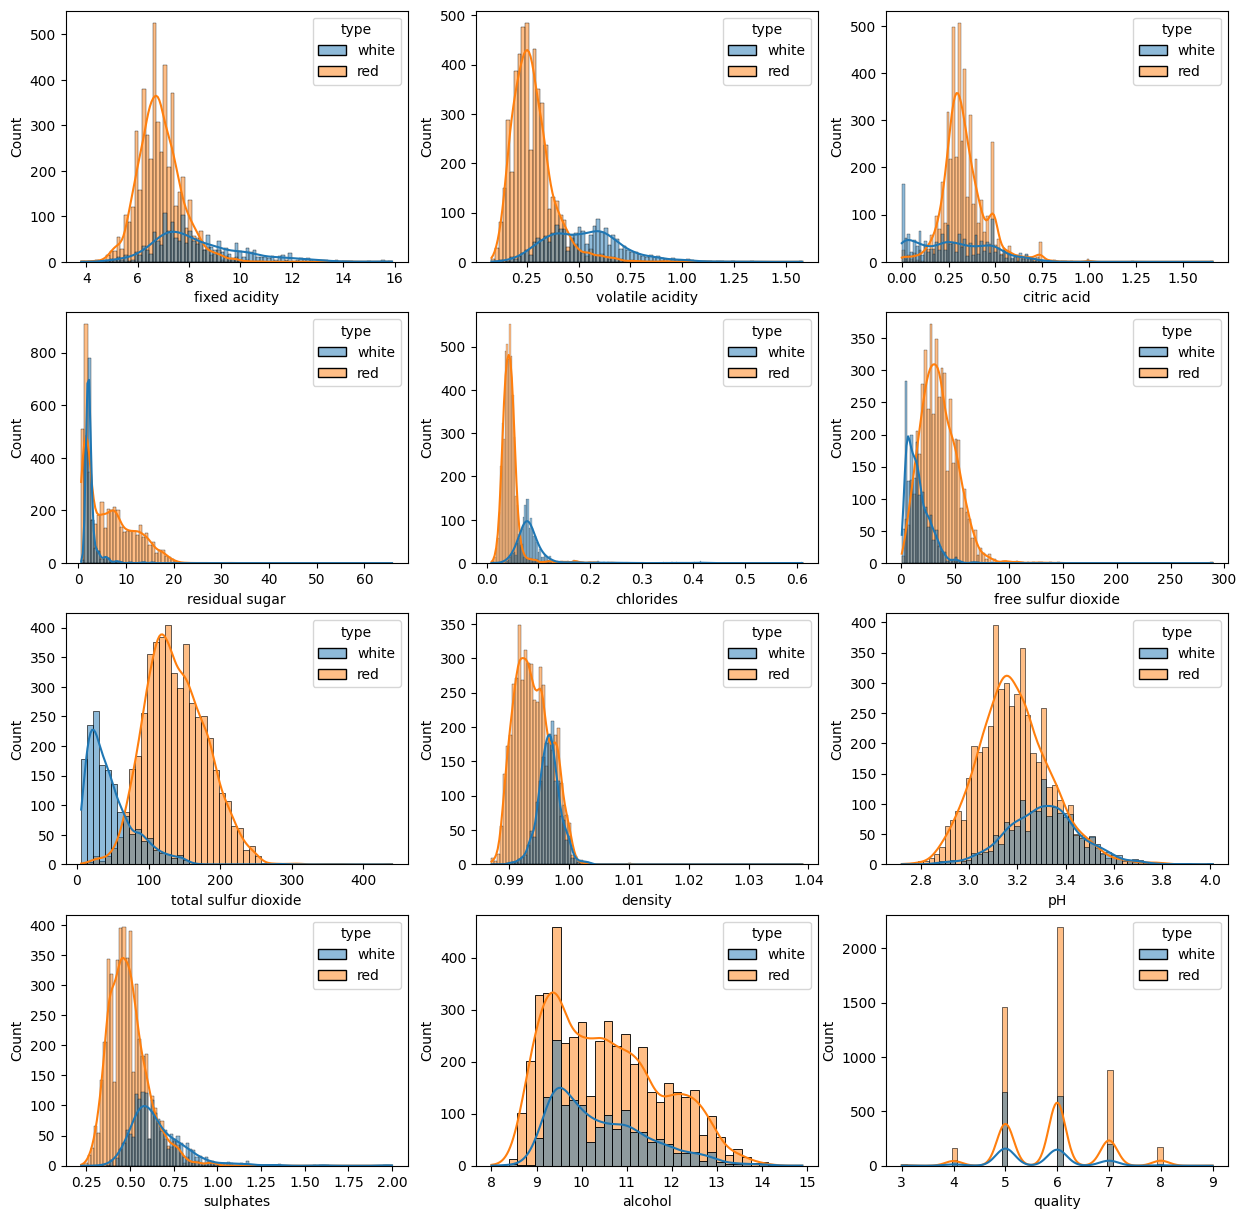

In [5]:
## Histograms of all core features 
fig,ax = plt.subplots(4,3, figsize=(15, 15))

i,j = 0,0
for feature in raw_join.columns[:-1]:
    sns.histplot(data = raw_join, x = feature, hue= "type", ax = ax[i,j],stat= "count", kde=True)
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1

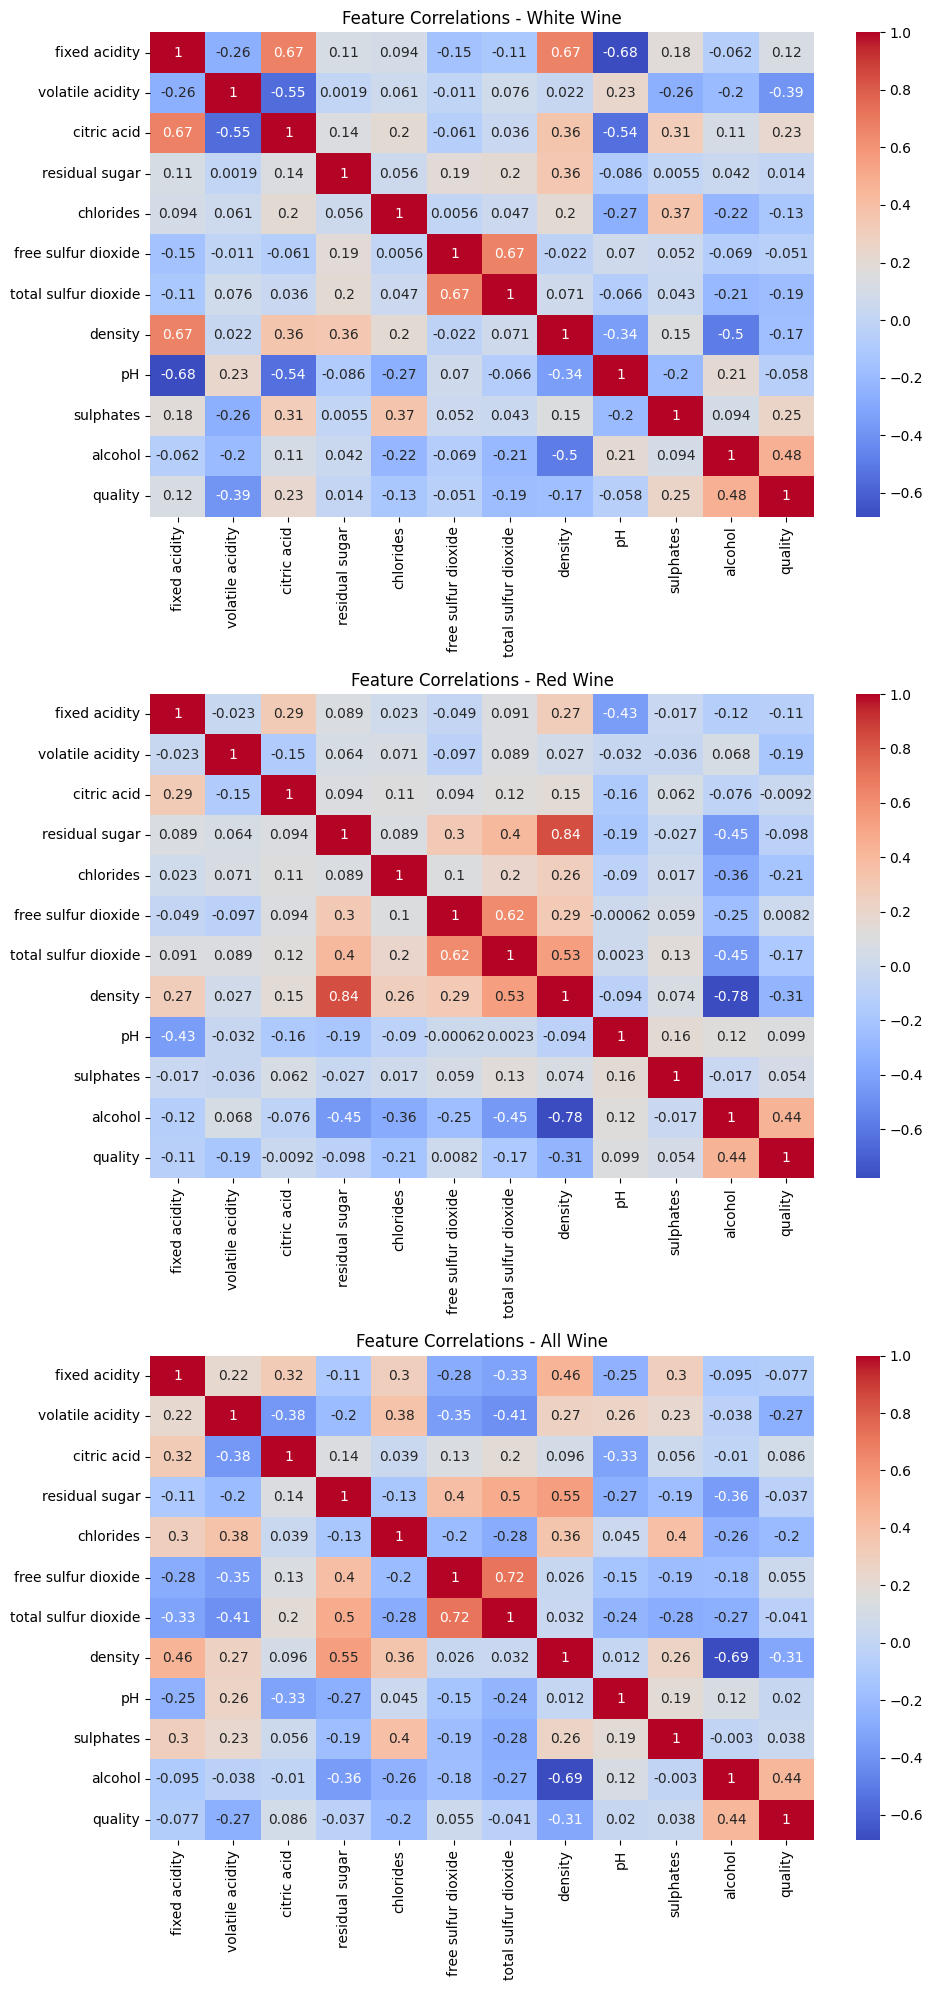

In [6]:
## Correlation Matrix of all core features (red and white wine)
fig,ax = plt.subplots(3,1, figsize=(10,20))

corr_white = raw_white.corr()
corr_red = raw_red.corr()
corr_join = raw_join.corr()

sns.heatmap(corr_white, annot=True, ax = ax[0],cmap='coolwarm')
ax[0].set_title("Feature Correlations - White Wine")
sns.heatmap(corr_red, annot=True, ax = ax[1],cmap='coolwarm')
ax[1].set_title("Feature Correlations - Red Wine")
sns.heatmap(corr_join, annot=True, ax = ax[2],cmap='coolwarm')
ax[2].set_title("Feature Correlations - All Wine")
fig.tight_layout()

Interesting Observations/Correlations observed include

- Strong Postive Correlations:
    - Fixed Acidity Vs Citric Acid (This would expected)
    - Fixed Acidity Vs Density (This is an interesting correlation, as it presents stronger in white wine)
    - Residual Suger Vs Density (This is an interesting correlation, as it presents stronger in red wine)
    - Free Sulfur Dioxide vs Total Sulfur Dioxide (This would expected)
    - Quality Vs Alcohol (This is interesting, and slightly amusing from its connotations)


- Strong Negative Correlations:
    - Alchol Vs Density (This would expected, as alcohol thins out the wine)
    - Fixed Acidity Vs pH (Somewhat expected)
    - Volotile Acidity Vs Citric Acid (This is an interesting correlation, as it presents stronger in white wine)
    - Quality vs Volotile Acidity (This is an interesting correlation, as it presents stronger in white wine)

# Interesting Correlations Plotting

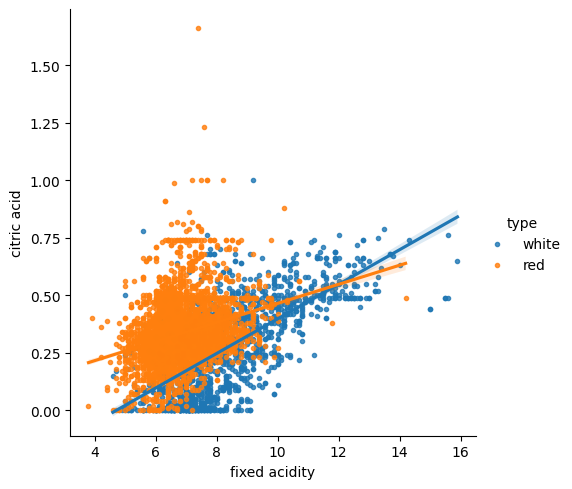

In [7]:
g = sns.lmplot(data=raw_join,x="fixed acidity", y="citric acid", hue="type",markers = ".")

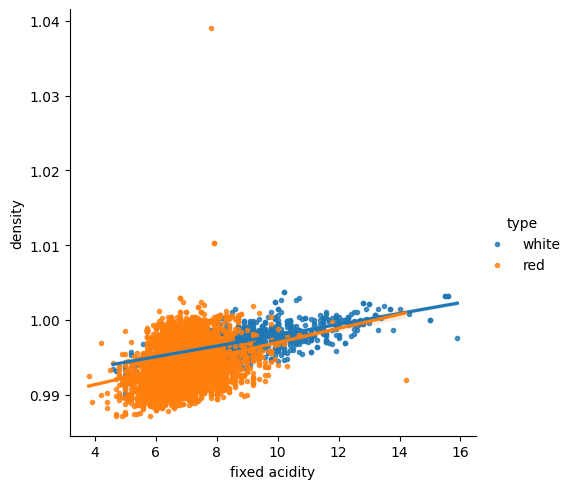

In [8]:
g = sns.lmplot(data=raw_join,x="fixed acidity", y="density", hue="type",markers = ".")

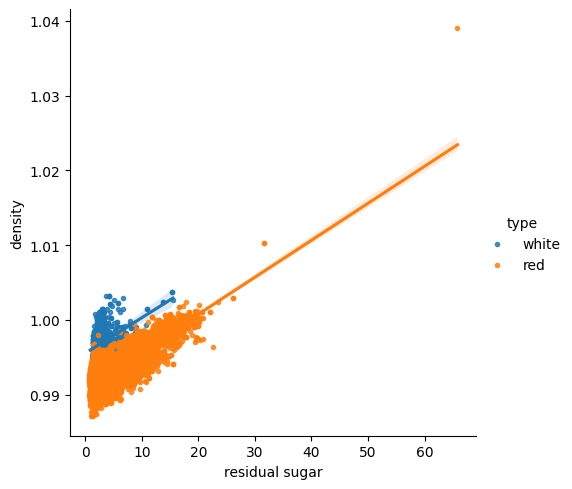

In [9]:
g = sns.lmplot(data=raw_join,x="residual sugar", y="density", hue="type",markers = ".")

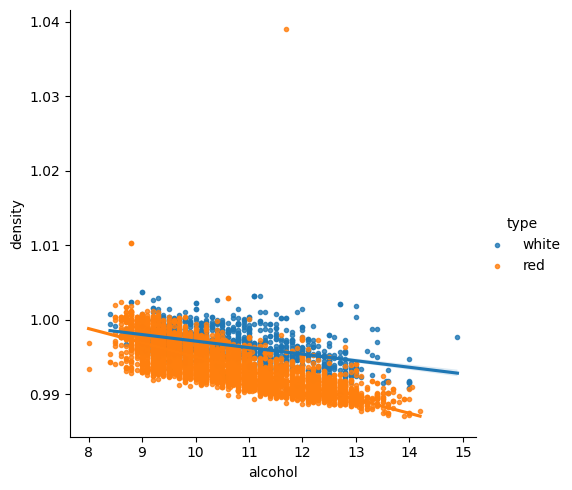

In [10]:
g = sns.lmplot(data=raw_join,x="alcohol", y="density", hue="type",markers = ".")

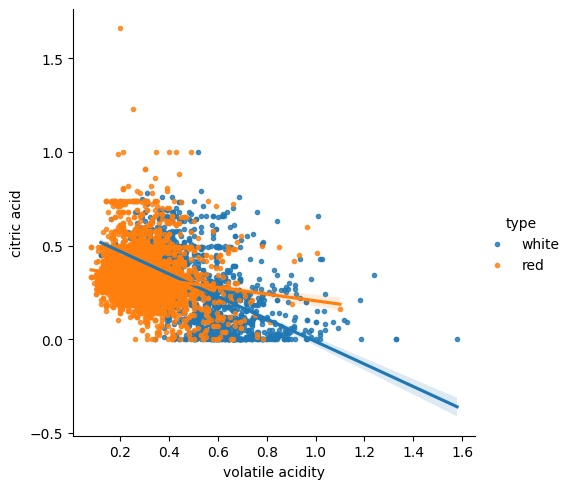

In [11]:
g = sns.lmplot(data=raw_join,x="volatile acidity", y="citric acid", hue="type",markers = ".")